
max_depth = 2:
  Accuracy:  0.7724
  Precision: 0.8906
  Recall:    0.5135
  F1-score:  0.6514

max_depth = 3:
  Accuracy:  0.8097
  Precision: 0.8125
  Recall:    0.7027
  F1-score:  0.7536

max_depth = 5:
  Accuracy:  0.7948
  Precision: 0.7692
  Recall:    0.7207
  F1-score:  0.7442

max_depth = 7:
  Accuracy:  0.7799
  Precision: 0.8250
  Recall:    0.5946
  F1-score:  0.6911

max_depth = 10:
  Accuracy:  0.7761
  Precision: 0.7742
  Recall:    0.6486
  F1-score:  0.7059

max_depth = None:
  Accuracy:  0.7537
  Precision: 0.6991
  Recall:    0.7117
  F1-score:  0.7054
Drzewo decyzyjne wyniki::
max_depth  accuracy  precision   recall  f1_score
        2  0.772388   0.890625 0.513514  0.651429
        3  0.809701   0.812500 0.702703  0.753623
        5  0.794776   0.769231 0.720721  0.744186
        7  0.779851   0.825000 0.594595  0.691099
       10  0.776119   0.774194 0.648649  0.705882
     None  0.753731   0.699115 0.711712  0.705357

Najlepszy max_depth według F1-score: 3


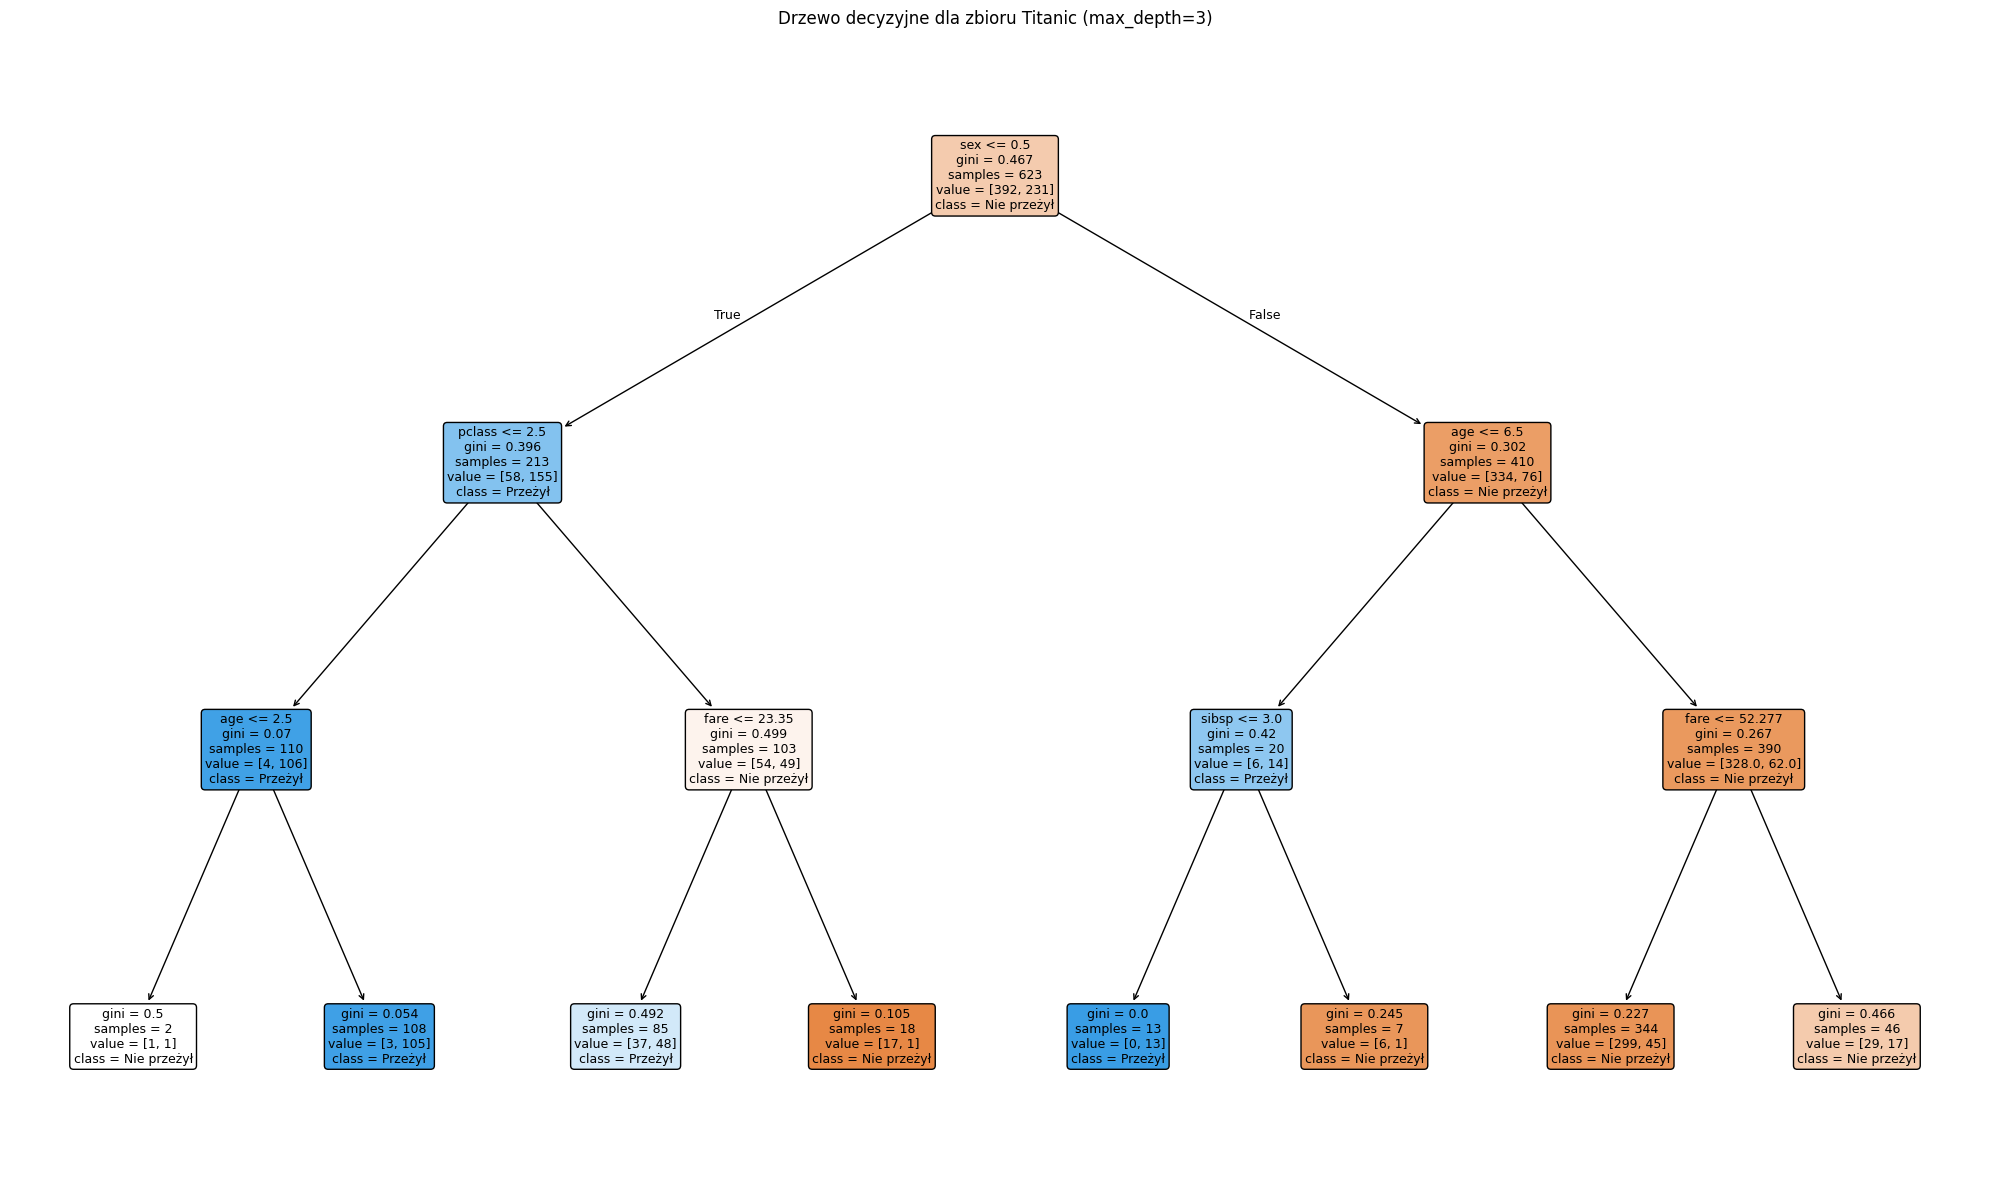


k = 1:
  Accuracy:  0.7575
  Precision: 0.6855
  Recall:    0.7658
  F1-score:  0.7234

k = 3:
  Accuracy:  0.7873
  Precision: 0.7700
  Recall:    0.6937
  F1-score:  0.7299

k = 5:
  Accuracy:  0.7873
  Precision: 0.7935
  Recall:    0.6577
  F1-score:  0.7192

k = 7:
  Accuracy:  0.7761
  Precision: 0.7576
  Recall:    0.6757
  F1-score:  0.7143

k = 9:
  Accuracy:  0.7948
  Precision: 0.8043
  Recall:    0.6667
  F1-score:  0.7291

k = 11:
  Accuracy:  0.7836
  Precision: 0.7849
  Recall:    0.6577
  F1-score:  0.7157

k = 15:
  Accuracy:  0.7910
  Precision: 0.8022
  Recall:    0.6577
  F1-score:  0.7228
Wyniki KNN:
 k  accuracy  precision   recall  f1_score
 1  0.757463   0.685484 0.765766  0.723404
 3  0.787313   0.770000 0.693694  0.729858
 5  0.787313   0.793478 0.657658  0.719212
 7  0.776119   0.757576 0.675676  0.714286
 9  0.794776   0.804348 0.666667  0.729064
11  0.783582   0.784946 0.657658  0.715686
15  0.791045   0.802198 0.657658  0.722772

Optymalne k według accura

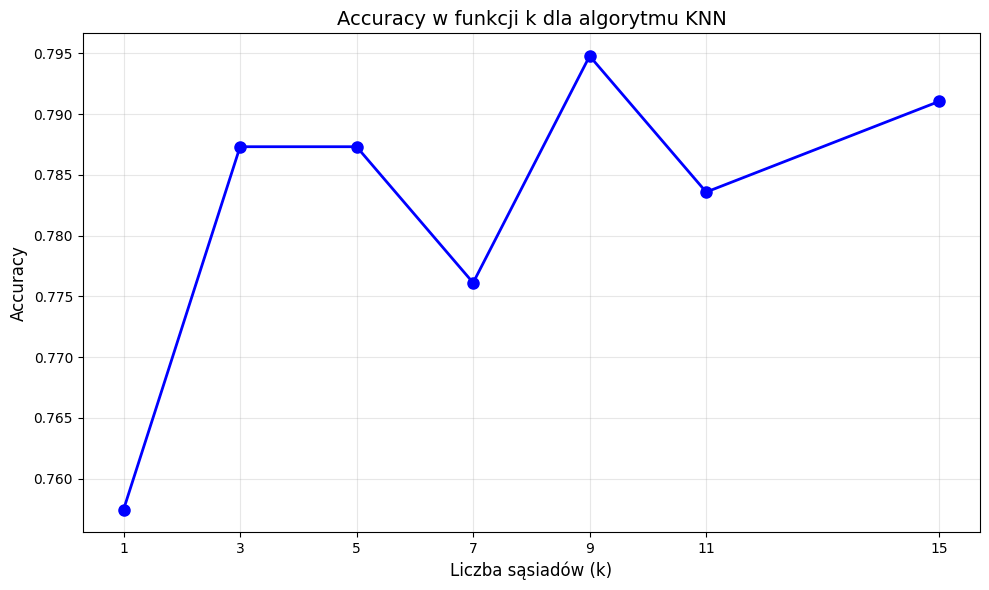

Porównanie:

Najlepsza accuracy - Drzewo decyzyjne: 0.8097 (max_depth=3)
Najlepsza accuracy - KNN: 0.7948 (k=9)

Lepszy model: Drzewo decyzyjne


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dane = sns.load_dataset('titanic')

kolumny = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']
df = dane[kolumny].copy()

df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

enkoder_plec = LabelEncoder()
df['sex'] = enkoder_plec.fit_transform(df['sex'])

enkoder_port = LabelEncoder()
df['embarked'] = enkoder_port.fit_transform(df['embarked'])

cechy = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[cechy]
y = df['survived']

X_ucz, X_test, y_ucz, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

wartosci_depth = [2, 3, 5, 7, 10, None]
wyniki_drzewo = []

for depth in wartosci_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_ucz, y_ucz)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    wyniki_drzewo.append({
        'max_depth': str(depth),
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

    print(f"\nmax_depth = {depth}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-score:  {f1:.4f}")

tabela_drzewo = pd.DataFrame(wyniki_drzewo)
print("Drzewo decyzyjne wyniki::")
print(tabela_drzewo.to_string(index=False))

najlepszy_idx = tabela_drzewo['f1_score'].idxmax()
najlepszy_depth = wartosci_depth[najlepszy_idx]
print(f"\nNajlepszy max_depth według F1-score: {najlepszy_depth}")

najlepsze_drzewo = DecisionTreeClassifier(max_depth=najlepszy_depth, random_state=42)
najlepsze_drzewo.fit(X_ucz, y_ucz)

plt.figure(figsize=(20, 12))
plot_tree(najlepsze_drzewo,
          feature_names=cechy,
          class_names=['Nie przeżył', 'Przeżył'],
          filled=True,
          rounded=True,
          fontsize=9)
plt.title(f'Drzewo decyzyjne dla zbioru Titanic (max_depth={najlepszy_depth})')
plt.tight_layout()
plt.savefig('drzewo_decyzyjne.png', dpi=150, bbox_inches='tight')
plt.show()

skalowacz = StandardScaler()
X_ucz_skalowane = skalowacz.fit_transform(X_ucz)
X_test_skalowane = skalowacz.transform(X_test)

wartosci_k = [1, 3, 5, 7, 9, 11, 15]
wyniki_knn = []

for k in wartosci_k:
    model_knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model_knn.fit(X_ucz_skalowane, y_ucz)
    pred_knn = model_knn.predict(X_test_skalowane)

    acc = accuracy_score(y_test, pred_knn)
    prec = precision_score(y_test, pred_knn)
    rec = recall_score(y_test, pred_knn)
    f1 = f1_score(y_test, pred_knn)

    wyniki_knn.append({
        'k': k,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

    print(f"\nk = {k}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-score:  {f1:.4f}")

tabela_knn = pd.DataFrame(wyniki_knn)
print("Wyniki KNN:")
print(tabela_knn.to_string(index=False))

najlepszy_k_idx = tabela_knn['accuracy'].idxmax()
najlepsze_k = wartosci_k[najlepszy_k_idx]
print(f"\nOptymalne k według accuracy: {najlepsze_k}")

plt.figure(figsize=(10, 6))
plt.plot(wartosci_k, tabela_knn['accuracy'], marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('Liczba sąsiadów (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy w funkcji k dla algorytmu KNN', fontsize=14)
plt.xticks(wartosci_k)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('knn_accuracy.png', dpi=150, bbox_inches='tight')
plt.show()

print("Porównanie:")

najlepsza_acc_drzewo = tabela_drzewo['accuracy'].max()
najlepsza_acc_knn = tabela_knn['accuracy'].max()

print(f"\nNajlepsza accuracy - Drzewo decyzyjne: {najlepsza_acc_drzewo:.4f} (max_depth={najlepszy_depth})")
print(f"Najlepsza accuracy - KNN: {najlepsza_acc_knn:.4f} (k={najlepsze_k})")

if najlepsza_acc_drzewo > najlepsza_acc_knn:
    print("\nLepszy model: Drzewo decyzyjne")
else:
    print("\nLepszy model: KNN")
